<br>
<body>
    <center><img src="https://hackathon-hi-paris.fr/wp-content/uploads/2022/03/HiPARIS_logo_bleu.png" style="width:50%;height:auto"></center>
    <p style="font-size:50px;text-align:center; color:#004475"><b><span style="color: #e61853">Hi!</span>ckathon 2</b></p><br>
    <p style="font-size:35px;text-align:center; color:#004475">Welcoming</p><br>
</body>
<br>

<br>
<p style="font-size:30px;color:#004475">Challenge Background </p>
<br>

<p style="text-align: justify">Since the signing of the Kyoto Protocol in 1997, the reduction of greenhouse gases and in particular CO$_2$ emissions has become a major issue for all private and public actors. This is a key point if we hope to meet the objectives of the 2015 Paris Conference on Global Warming (COP21) to limit global warming between 1.5°C and 2°C.</p>

<p style="text-align: justify">In this context, many companies take into account ESG (Environmental Social Governance) criteria in their long-term investment strategy to quantify the impact of the company's actions on the environment and society.</p>

<p style="text-align: justify">According to an INSEE study of 19/01/2021, the car remains the majority for home-work trips, even for short distances.</p>

<br>
<body>
    <center><img src="https://hackathon-hi-paris.fr/wp-content/uploads/2022/03/graphe_insee.png" style="width:50%;height:auto"></center>
<br>

<br>
<p style="font-size:30px;color:#004475">Challenge goals </p>
<br>

<p style="text-align: justify">A client wishing to improve the consideration of ESG criteria for his company calls on you to estimate the carbon emissions of the vehicles used by his employees to come to their workplace. Aware that it is necessary to take into account the carbon impact of its employees, the client would like you to provide a model capable of quickly estimating the carbon emission of a vehicle based on images from a video surveillance of the company's parking lot.</p>

<p style="text-align: justify">The images available contain only one vehicle (or object) and for each one the coordinates of a box locating the vehicle (or object) in the image are given.</p>

<p style="text-align: justify">Your model has to return as outputs the four coordinates of the box locating the vehicle and the vehicle's CO$_2$ carbon emission. Indeed given an image i containing a car, the output of the global model is as follows:</p>
    
<br>
<center>
    $(\hat{x}^{min}_{i},\hat{y}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{max}_{i},\hat{e}^{carbone}_{i})$
</center>
<br>  

Where: 
- $\hat{x}^{min}_{i}, \hat{y}^{min}_{i}$ predicted coordinates of top left corner of the box locating the vehicle.
- $\hat{x}^{max}_{i}, \hat{y}^{max}_{i}$ predicted coordinates of the bottom right corner of the box locating the vehicle.

If the given image i does not contained a car, the output of the global model is the <b>null vector</b>. 
    
To assess the results, we compute the following metric:</p>

<br>
<center>
    $\frac{1}{n}\sum_{i=1}^{n}{0.7\cdot{(1-IoU_i)} + 0.3\cdot\frac{\lvert e_i^{carbone} - \hat{e_i}^{carbone} \rvert}{e_i^{carbone}}}$
</center>

<br>
Where: 

- $IoU_i$ is the Intersection Over Union for the i-th image
- $e_i^{carbone}$ the real carbon emission of the i-th vehicle
- $\hat{e_i}^{carbone}$ the predicted carbon emission of the i-th vehicle 

<p style="text-align: justify">Given four predicted coordinates $(\hat{x}^{min}_{i},\hat{y}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{max}_{i})$ and the four true coordinates $(x^{min}_{i}, y^{min}_{i},x^{max}_{i}, y^{max}_{i})$ of the box locating a vehicle in an image, here are the steps to calculate the $IoU$.</p>

<p style="text-align: justify">Considering there is a non null intersection between the two boxes, first we calculate the top left and the bottom right corner of the intersection:</p>
<br>
<center>
    $x_{inter_{1}} = max(x^{min}_{i},\hat{x}^{min}_{i})$
</center>
<center>
    $x_{inter_{2}} = min(x^{max}_{i},\hat{x}^{max}_{i})$
</center>
<center>
    $y_{inter_{1}} = max(y^{min}_{i},\hat{y}^{min}_{i})$
</center>
<center>
    $y_{inter_{2}} = min(y^{max}_{i},\hat{y}^{max}_{i})$
</center>

<p style="text-align: justify">Then we calculate the area of the intersection:</p>
<center>
    $width\_inter = x_{inter_{2}} - x_{inter_{1}}$
</center>
<center>
    $height\_inter = y_{inter_{2}} - y_{inter_{1}}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_inter = height\_inter\cdot{width\_inter}$
</center>

<p style="text-align: justify">Then we calculate the area of each box:</p>
<center>
    $width\_box1 = \hat{x}^{max}_{i}-\hat{x}^{min}_{i}$
</center>
<center>
    $height\_box1 = \hat{y}^{max}_{i}-\hat{y}^{min}_{i}$
</center>
<center>
    $width\_box2 = x^{max}_{i}-x^{min}_{i}$
</center>
<center>
    $height\_box2 = y^{max}_{i}-y^{min}_{i}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_box1 = width\_box1\cdot{height\_box1}$
</center>
<center>
    $area\_box2 = width\_box2\cdot{height\_box2}$
</center>

<p style="text-align: justify">Finally we calculate the $IoU$:</p>
<center>
    $area\_union = area\_box1 + area\_box2 - area\_inter$
</center>
<p style="text-align: justify"></p>
<center>
    $IoU = \frac{area\_inter}{area\_union}$
</center>

<p style="text-align: justify"> If there is no intersection between the two boxes, the $IoU$ is 0.</p>
    
<p style="text-align: justify">The following image illustrates the IoU calculus:</p>

<br>
<body>
    <center><img src="https://hackathon-hi-paris.fr/wp-content/uploads/2022/03/IoU.png" style="width:50%;height:auto"></center>
<br>
    
<br>
<p style="font-size:30px;color:#004475">Data Description </p>
<br>

<p style="text-align: justify">The client has provided you with different data to answer the problem:</p>

<ul>
  <li><b>2641</b> images contained in the folder <b>datasets/datasets_train/train</b>.</li>
    <li><b>392</b> images contained in the folder <b>datasets/datasets_train/car_models_database_train</b> in order to match the car models with the train images.</li>
    <li>a csv file named <b>_annotation.csv</b> in the folder <b>datasets/datasets_train/train_annotation</b> with several variables:</li>
    <ul>
        <li><b>im_name</b>: image name.</li>
        <li><b>x_min</b>: the x coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>y_min</b>: the y coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>x_max</b>: the x coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>y_max</b>: the y coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>class</b>: What is the object inside the box.</li>
        <li><b>models</b>: the car model.</li>
    </ul>
    <li>an excel file named <b>car_models_footprint.csv</b> contained in the folder <b>datasets</b> with information on carbon emissions of each car model available.</li>    
</ul>
    
Feel free to add any open source data that you think is relevant to the challenge.
    
<br>
<p style="font-size:30px;color:#004475">Deliverables </p>
<br>

<p style="text-align: justify">As part of this challenge, the client expects three deliverables from you: 
    <ul>
        <li> The results obtained on the test data set submitted in csv format named <b>name_of_your_group.csv</b> with 6 columns in the following order: <b>im_name</b>, <b>x_min</b>, <b>y_min</b>, <b>x_max</b>, <b>y_max</b>, <b>e</b>. The test data set will be provided <b>3 hours</b> before the end of the Hackathon.
        <li> A scientific procedure document presenting the proposed approach and the results obtained regarding the metric presented above.</li>
        <li> a video presentation of 2 min presenting your solution, its advantages, its feasibility to your client.</li>
    </ul>
</p>

<p style="text-align: justify"> All deliverables must be deposited <b>activities_data/final_challenge/group_xxxxx_shared_workspace/submissions</b> before <b>6pm on Sunday, March 6</b>.</p>

<br>
<p style="font-size:30px;color:#004475">Challenge evaluation </p>
<br>

<p style="text-align: justify">Based on your deliverables, you are evaluated on 5 final criteria by a jury:</p>
<ul>
    <li><b>Model Performance</b>: The solution delivers a satisfactory score for the metric used.</li>
    <li><b>Innovation</b>:  Your ability to surprise the jury with the format and content of the video business pitch or the presentation of the scientific procedure document.</li>
    <li><b>Scientific approach</b>: Clarity, rigor, justification and relevance of your scientific approach, expressed on the scientific procedure document.</li>
    <li><b>Interdisciplinarity</b>: Your ability to collaborate, organize your team, and include different competences from different backgrounds in a coherent project, taking into account both business and technical aspects. For this prize, you'll be evaluated on the scientific document procedure and the final pitch.</li>
    <li><b>Best Business opportunity</b>: Communicate clearly and distinctively to pitch the solution convincingly, structure your argument, create a feasible project with a strong business opportunity, address clearly the subject of your choice and its challenges.</li>
</ul>  

You must provide <b>end-to-end error-free code</b> that is <b>compatible</b> with the environment provided in the Hfactory. You will have to <b>push</b> your code in a <b>Git directory</b> with the right formatting and splitting.

<br>
<p style="font-size:30px;color:#004475">Benchmark</p>
<br>

<p style="text-align: justify"> A first naive method to predict the different bounded box is to estimate it using the average of each variable <b>x_min</b>, <b>y_min</b>, <b>x_max</b> and <b>y_max</b> measured for each bounded box, this will serve as a benchmark for the bounded box predictions. Then, we simply randomly assign the CO2 consumption of car models for each image.</p>

<p style="text-align: justify"> The proposed solution does not constitute a solution to be adopted to solve the challenge. It is presented to show you an example of a submission that meets the requirements.</p>

<li> Splitting the data into train eval set</li>

In [4]:
from sklearn.model_selection import train_test_split

bbox_train, bbox_eval = train_test_split(
    bbox_train_full, test_size=0.2, random_state=1234
)

<li> Implementation of the naive method and evaluation on an evaluation image.</li>

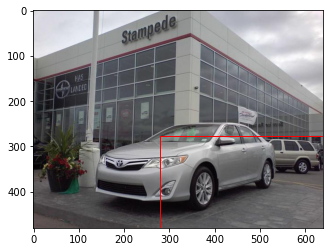

In [5]:
eval_pred = bbox_eval.copy()

# naive predictions for the bounded box
eval_pred["x_min"] = np.mean(bbox_train["x_min"])
eval_pred["x_max"] = np.mean(bbox_train["x_max"])
eval_pred["y_min"] = np.mean(bbox_train["y_min"])
eval_pred["y_max"] = np.mean(bbox_train["y_max"])

# test on the first image
im_pred_test = eval_pred.iloc[2, 0]
x1, y1, x2, y2 = eval_pred.loc[eval_pred["im_name"] == im_pred_test].iloc[0, 1:]

load_plot(im_pred_test, x1, y1, x2, y2)

<li>Random assignment of car models</li>

In [6]:
cars_path = "../car_models_footprint.csv"
car_models = pd.read_csv(cars_path, sep=";")

# randomly assign CO2 consumption of car models
np.random.seed(1234)

emission = car_models["Average of CO2 (g per km)"].dropna()
eval_pred["e"] = eval_pred["x_min"].apply(lambda x: np.random.choice(emission, 1)[0])

<li>Submission of the results taking care to respect the name of the columns and deleting the index on export. Please <b>refer the right submission path</b> of your group for the hackathon by replacing xxxxx in the path given.</li>

In [7]:
# Submit the results
eval_pred.to_csv(
    "../../group_00099_shared_workspace/submissions/test_team.csv", index=False
)  # xxxx for your Hfactory ID group

# <>

In [ ]:
!pip install yolov4

In [ ]:
!pip install opencv-python

# Régression de l'emission
Objectif : à partir des images de car_models, créer une fonction qui prédit les émissions de la voiture
- input : voiture croppée
- output : emission

In [14]:
labels = []
i = 0
for path in sorted(glob.glob(r"/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/datasets_train/car_models_database_train/*")):
    i+=1
    labels.append(ntpath.basename(path).split("_")[0])
    if '.' not in path:
        print(path)

labels.append("Acura ZDX Hatchback 2012")
labels.append("Acura ZDX Hatchback 2012")
print(labels[:3])

labels_em = [car_models.loc[car_models["models"] == label , "Average of CO2 (g per km)"].iloc[0]  for label in labels]
print(labels_em[:3])

['AM General Hummer SUV 2000', 'AM General Hummer SUV 2000', 'AM General Hummer SUV 2000']
[106.0, 106.0, 106.0]


In [15]:
batch_size = 4

TRAIN_PATH = r"/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/datasets_train/"
datagen = ImageDataGenerator(validation_split=0.2)
train_generator = datagen.flow_from_directory(TRAIN_PATH,
                                      shuffle=False,
                                      batch_size=batch_size
                                      , classes=['car_models_database_train']
                                     , class_mode = None
                                    , subset='training')

def generate_batch_y(lst, batch_size):
    """  Yields batch of specified size """
    for i in range(0, len(lst), batch_size):
        yield lst[i : i + batch_size]
        
gen_y = generate_batch_y(labels_em, batch_size)

Found 316 images belonging to 1 classes.


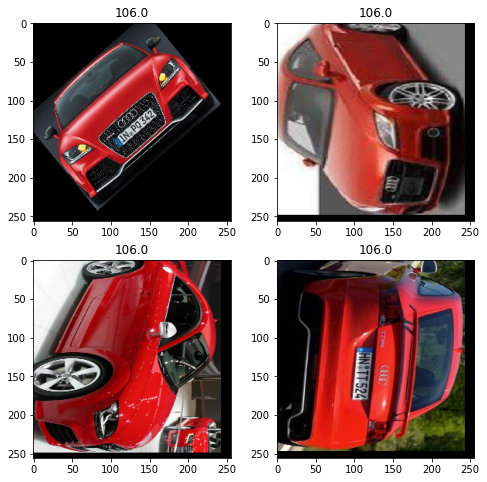

In [16]:
batch_x = next(train_generator)
batch_y = next(gen_y)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i in range(batch_x.shape[0]):
    plt.subplot(2, 2, i+1)
    result = batch_x[i].astype('uint8')
    plt.imshow(result)
    plt.title(str(batch_y[i]))

# Prédiction des émissions

In [29]:
import numpy as np
import glob
import ntpath
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

In [30]:
os.getcwd()
os.chdir('/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/Welcoming_final_challenge')

In [31]:
cars_path = "../car_models_footprint.csv"
car_models = pd.read_csv(cars_path, sep=";")

In [32]:
s_pathToImages = pd.Series(glob.glob(r"/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/datasets_train/car_models_database_train/*"))
s_models = s_pathToImages.apply(lambda x : x.split("/")[-1].split("_")[0])
frame = {"path" : s_pathToImages, "models" : s_models}
df_images = pd.DataFrame(frame)

In [33]:
df = pd.merge(car_models, df_images, on = "models")
df.head()

,models,Brand,year,Average Urban Consumption,Average extra-urban consumption,Average mixed consumption,Average of CO2 (g per km),Average CO type I,path
0,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.0,8.9,12.6,293.0,"0,508",/home/jovyan/activities_data/hi__paris_2022_ha...
1,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.0,8.9,12.6,293.0,"0,508",/home/jovyan/activities_data/hi__paris_2022_ha...
2,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.0,8.9,12.6,293.0,"0,508",/home/jovyan/activities_data/hi__paris_2022_ha...
3,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.0,8.9,12.6,293.0,"0,508",/home/jovyan/activities_data/hi__paris_2022_ha...
4,Chevrolet Corvette ZR1 2012,Chevrolet,2012,19.0,8.9,12.6,293.0,"0,508",/home/jovyan/activities_data/hi__paris_2022_ha...


<AxesSubplot:xlabel='Average of CO2 (g per km)', ylabel='Count'>

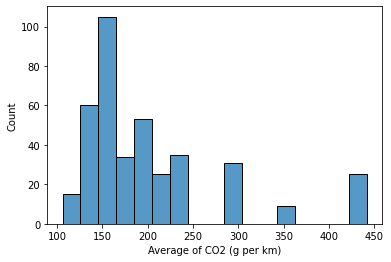

In [34]:
sns.histplot(df, x = "Average of CO2 (g per km)")

In [114]:
n_classes = 2
discretizer = KBinsDiscretizer(n_bins=n_classes, encode='ordinal', strategy = 'kmeans')

df["classe_conso"] = discretizer.fit_transform(np.array(df["Average of CO2 (g per km)"]).reshape(-1, 1)).astype(str)
df["conso_discretized"] = discretizer.inverse_transform(np.array(df["classe_conso"]).reshape(-1, 1))

<AxesSubplot:xlabel='Average of CO2 (g per km)', ylabel='Count'>

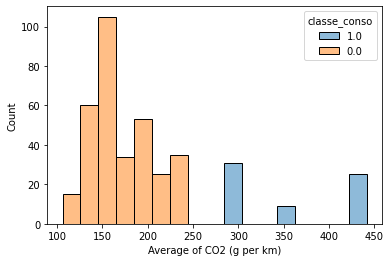

In [115]:
sns.histplot(df, x = "Average of CO2 (g per km)",hue = "classe_conso")

In [116]:
df_train, df_test = train_test_split(df, test_size = 0.2)

target_size = (256,256,3)

datagen = ImageDataGenerator(rescale = 1./255.)
train_generator = datagen.flow_from_dataframe(df_train, x_col = "path", y_col = "classe_conso", batch_size = 4, target_size = target_size[:2])
validation_generator = datagen.flow_from_dataframe(df_test, x_col = "path", y_col = "classe_conso", batch_size = 4, target_size = target_size[:2])

Found 313 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.


In [117]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=target_size))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(n_classes, activation='softmax'))


def my_metric_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

model.compile(keras.optimizers.RMSprop(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy", my_metric_fn])


# Ajouter callback

In [118]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit(x=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=3)

Epoch 1/3
78/78 [==============================] - 9s 104ms/step - loss: 0.7125 - accuracy: 0.8188 - my_metric_fn: 0.1635 - val_loss: 0.5953 - val_accuracy: 0.8026 - val_my_metric_fn: 0.2018
Epoch 2/3
78/78 [==============================] - 8s 104ms/step - loss: 0.4546 - accuracy: 0.8447 - my_metric_fn: 0.1360 - val_loss: 0.5080 - val_accuracy: 0.8158 - val_my_metric_fn: 0.1630
Epoch 3/3
78/78 [==============================] - 8s 103ms/step - loss: 0.4591 - accuracy: 0.8414 - my_metric_fn: 0.1351 - val_loss: 0.5481 - val_accuracy: 0.8158 - val_my_metric_fn: 0.1805


In [119]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'my_metric_fn', 'val_loss', 'val_accuracy', 'val_my_metric_fn'])


Text(0.5, 1.0, 'Accuracy during training')

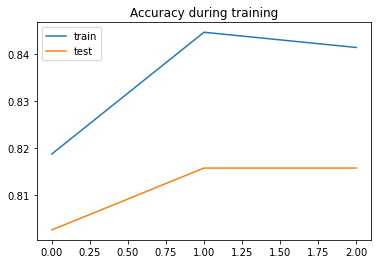

In [120]:
plt.plot(history.history["accuracy"], label = "train")
plt.plot(history.history["val_accuracy"], label = "test")
plt.legend()
plt.title("Accuracy during training")

In [121]:
model.evaluate(validation_generator)

20/20 [==============================] - 2s 81ms/step - loss: 0.5626 - accuracy: 0.7975 - my_metric_fn: 0.1873


[0.5626316666603088, 0.797468364238739, 0.18727797269821167]

In [122]:
pred = model.predict(validation_generator)
pred[:3]

array([[0.6237914 , 0.37620866],
       [0.55180633, 0.44819367],
       [0.5901293 , 0.4098707 ]], dtype=float32)

In [123]:
np.argmax(pred, axis =1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
classe_emissions = discretizer.inverse_transform(np.arange(discretizer.n_bins).reshape(-1,1))
classe_emissions

array([[185.09268037],
       [352.95333612]])

In [125]:
pred_emission = (pred@classe_emissions).ravel() ##* 150/pred_emission.mean()

In [126]:
y_true = df_test["Average of CO2 (g per km)"].values
np.mean(np.abs(y_true - pred_emission)/y_true)

0.4375942642869689

In [127]:
np.mean(np.abs(y_true - 160)/y_true)

0.20358682728165758